In [2]:
import cv2
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import subprocess
import os

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
test_attack = os.listdir('../img_dataset/test/attack')
test_normal = os.listdir('../img_dataset/test/normal')
train_attack = os.listdir('../img_dataset/train/attack')
train_normal = os.listdir('../img_dataset/train/normal')
test_attack.sort()
test_normal.sort()
train_attack.sort()
train_normal.sort()

In [4]:
print('Testset_attack :', len(os.listdir('../img_dataset/test/attack')))
print('Testset_normal :', len(os.listdir('../img_dataset/test/normal')))
print('Trainset_attack :', len(os.listdir('../img_dataset/train/attack')))
print('Trainset_normal :', len(os.listdir('../img_dataset/train/normal')))

Testset_attack : 308
Testset_normal : 439
Trainset_attack : 1210
Trainset_normal : 1774


(128, 128)


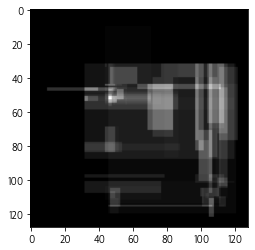

In [16]:
img = cv2.imread('../img_dataset/test/attack/attack_0001.png', 0)
plt.imshow(img, cmap='gray')
print(img.shape)

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    "../img_dataset/train/",
    target_size=(128, 128),
    class_mode='binary',
    batch_size=16
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    "../img_dataset/train/",
    target_size=(128, 128),
    class_mode='binary',
    batch_size=16
)

Found 2984 images belonging to 2 classes.
Found 2984 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 56448)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7225472   
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)              

In [11]:
epochs=50
history = model.fit(
    train_generator, 
    epochs=epochs,
    steps_per_epoch=16,
    validation_data = validation_generator
)

Epoch 1/50
16/16 [==============================] - 12s 772ms/step - loss: 0.5633 - accuracy: 0.7305 - val_loss: 0.5821 - val_accuracy: 0.8331
Epoch 2/50
16/16 [==============================] - 12s 756ms/step - loss: 0.6627 - accuracy: 0.7148 - val_loss: 0.5671 - val_accuracy: 0.7708
Epoch 3/50
16/16 [==============================] - 13s 786ms/step - loss: 0.5557 - accuracy: 0.7461 - val_loss: 0.5489 - val_accuracy: 0.7433
Epoch 4/50
16/16 [==============================] - 13s 822ms/step - loss: 0.5120 - accuracy: 0.8125 - val_loss: 0.5440 - val_accuracy: 0.7436
Epoch 5/50
16/16 [==============================] - 13s 791ms/step - loss: 0.6681 - accuracy: 0.7227 - val_loss: 0.5391 - val_accuracy: 0.7889
Epoch 6/50
16/16 [==============================] - 13s 803ms/step - loss: 0.6053 - accuracy: 0.7137 - val_loss: 0.5341 - val_accuracy: 0.7758
Epoch 7/50
16/16 [==============================] - 15s 919ms/step - loss: 0.6263 - accuracy: 0.7344 - val_loss: 0.5403 - val_accuracy: 0.7614

In [12]:
model.save_weights('conan_ver_02.h5')

In [1]:
test_filenames = os.listdir("../dataset/credential/img/point/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})

nb_samples = test_df.shape[0]

test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../dataset/credential/img/point/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128, 128),
    batch_size = 16,
    shuffle = False
)

NameError: name 'os' is not defined

In [32]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/16))

In [36]:
predict

array([[0.9609329 ],
       [0.92127734],
       [0.5897776 ],
       [0.9789414 ],
       [0.04261968],
       [0.9197974 ],
       [0.94318926],
       [0.22879478],
       [0.8425806 ],
       [0.45215386],
       [0.2637325 ],
       [0.17357868],
       [0.42193854],
       [0.7070233 ],
       [0.8067026 ],
       [0.0075314 ],
       [0.7191653 ],
       [0.00996274],
       [0.9079332 ],
       [0.23980647],
       [0.5753059 ],
       [0.9729494 ],
       [0.21539575],
       [0.03671032],
       [0.95768636],
       [0.76638794],
       [0.2999816 ],
       [0.40643087],
       [0.80003977],
       [0.7860048 ],
       [0.17421833],
       [0.5468666 ],
       [0.20949277],
       [0.2492682 ],
       [0.9075953 ],
       [0.4319697 ],
       [0.9378437 ],
       [0.05473819],
       [0.09748325],
       [0.84730303],
       [0.00993252],
       [0.5322014 ],
       [0.03538856],
       [0.59976214],
       [0.11808255],
       [0.82430387],
       [0.9064966 ],
       [0.165

In [44]:
predict[predict <= 0.5] = 0. # attack
predict[predict > 0.5] = 1. # normal

(len(predict[predict == 0.]) / len(predict)) * 100

44.8051948051948

# attack = 0, normal = 1

In [45]:
train_generator.class_indices.items()

dict_items([('attack', 0), ('normal', 1)])

In [46]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'attack', 1: 'normal'}

# 성능이 엉망이다.
- 파일 분리시 단순 아이피가 아닌 보고서에 나온 알고리즘으로 접근하자
- xml-rpc 사용자와 이상패턴 호스트 군은 제외하고 분류 모델을 제작한다.(대회 주제에서 벗어난다.)
- 모델을 각 공격별로 만들어야한다.
- 예상 시스템 진행
    - input으로 로그.csv를 넣는다.
    - 1분 단위로 절삭
    - 절삭 csv파일을 이미지화
    - 이미지가 모델 A에 의해 분류 되고 데이터 프레임에 기록된다.
    - 이미지가 모델 B에 의해 분류 되고 데이터 프레임에 기록된다.
    - 이미지가 모델 C에 의해 분류 되고 데이터 프레임에 기록된다.
    - 파일명과 대조하여 모델 A, B, C로부터 잘 분류 되었는지 판단.
        - 예상 결과
        - 파일명 : 2020-08-xx_xx:xx.csv
        - A 공격 : 0
        - B 공격 : 1
        - C 공격 : 1
            - 판독 : 해당 시간은 B와 C 공격에대한 이상행위 접근이 있었습니다.
        
## 크루덴셜 스터핑 분류 모델
- 크루덴셜 스터핑 공격시 컬럼에 1을 추가하고 다시 1분 단위로 파일을 절단하고 파일명에 공격 여부 기록.
- 절삭된 csv 파일에서 ['Timestamp'], ['Host'], ['Attack'] 컬럼을 삭제하여 공격으로 특정 될 수 있는 정보를 지운다.
- 이미지화(점 or 면)
- 모델 제작을 진행(유명한 모델로)하고 테스트시 80%가 넘으면 다음 모델을 제작

## 부르트 포스 분류 모델
- 이하 동문

## 웹 스크래핑 분류 모델
- 이하 동문

## 

<AxesSubplot:>

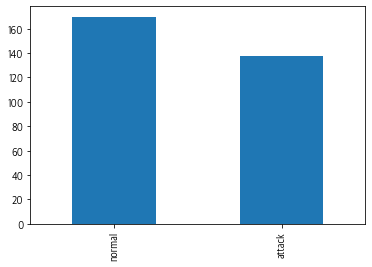

In [50]:
one = predict > 0.5

test_df['category'] = one

test_df['category'] = test_df['category'].replace(label_map)

test_df['category'].value_counts().plot.bar()